In [245]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import shap
import warnings
warnings.filterwarnings("ignore")

In [246]:
# Load the dataset
df = pd.read_csv("C:/Users/linda/Downloads/Nono/bank-full.csv", delimiter = ';')

# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [248]:
print(df['poutcome'].unique())

['unknown' 'failure' 'other' 'success']


In [249]:
df['poutcome'].replace('unknown', 'other', inplace=True)

In [250]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [251]:
# Count the occurrences of each unique value
value_counts = df['pdays'].value_counts()
print("Count of each unique value:\n", value_counts)

Count of each unique value:
 pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 769        1
 587        1
 778        1
 854        1
Name: count, Length: 559, dtype: int64


In [252]:
df['pdays'] = df['pdays'].replace(-1, 0)

In [253]:
# Count the occurrences of each unique value
value_counts = df['pdays'].value_counts()
print("Count of each unique value:\n", value_counts)

Count of each unique value:
 pdays
0      36954
182      167
92       147
183      126
91       126
       ...  
749        1
769        1
587        1
778        1
854        1
Name: count, Length: 559, dtype: int64


In [254]:
df['pdays'] = df['pdays'].apply(lambda x: 1 if x > 0 else 0)

In [255]:
# Count the occurrences of each unique value
value_counts = df['campaign'].value_counts()
print("Count of each unique value:\n", value_counts)

Count of each unique value:
 campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
38        3
43        3
41        2
50        2
37        2
55        1
51        1
63        1
46        1
58        1
39        1
44        1
Name: count, dtype: int64


In [256]:
df.rename(columns={'contact':'contact type'}, inplace= True)
df.rename(columns={'day':'last day of contact'}, inplace= True)
df.rename(columns={'month':'last month of contact'}, inplace= True)
df.rename(columns={'duration':'duration of call (seconds)'}, inplace= True)
df.rename(columns={'campaign':'times contacted this campaign'}, inplace= True)
df.rename(columns={'pdays':'days passed since last contact'}, inplace= True)
df.rename(columns={'previous':'times contacted before current campaign'}, inplace= True)
df.rename(columns={'poutcome':'previous campaign outcome'}, inplace= True)
df.rename(columns={'y':'outcome'}, inplace= True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact type,last day of contact,last month of contact,duration of call (seconds),times contacted this campaign,days passed since last contact,times contacted before current campaign,previous campaign outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,other,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,other,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,other,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,other,no


In [257]:
features = ['age','job', 'marital', 'education', 'default', 'balance', 'housing', 'loan','times contacted this campaign','times contacted before current campaign', 'days passed since last contact', 'previous campaign outcome', 'outcome']
X = df[features]

In [258]:
# Define feature groups
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'previous campaign outcome', 'days passed since last contact', 'outcome']
ordinal_features = ['education']  # Assuming it has an order (e.g., primary < secondary < tertiary)
numerical_features = ['balance', 'times contacted this campaign', 'age']

In [259]:
# Separate feature types from the dataset
X_categorical = X[categorical_features]
X_ordinal = X[ordinal_features]
X_numerical = X[numerical_features]

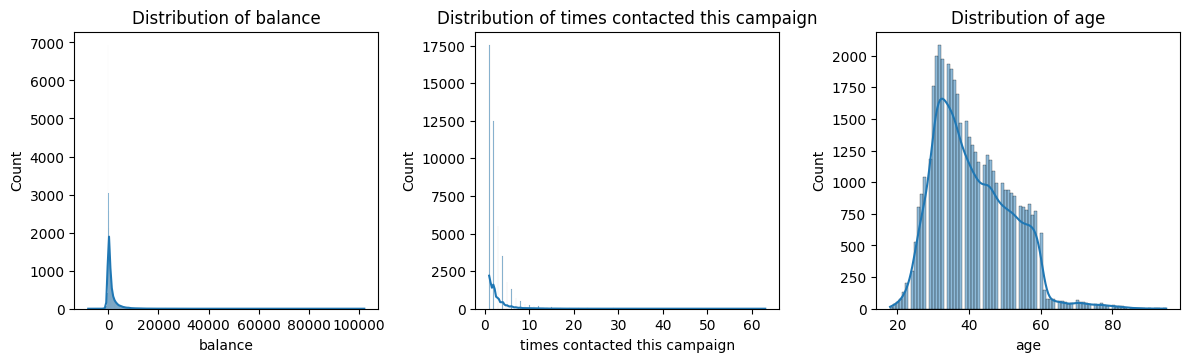

In [260]:
# Exploratory Data Analysis (EDA)

# Histograms for numerical features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(X_numerical, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

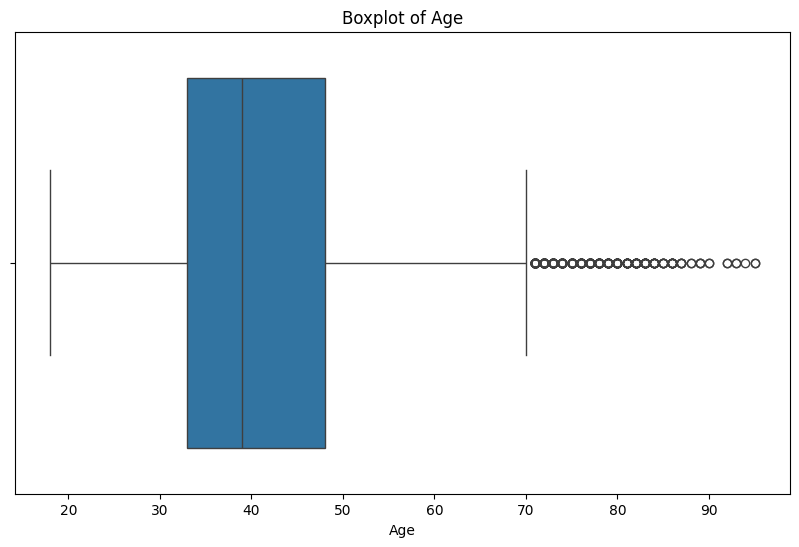

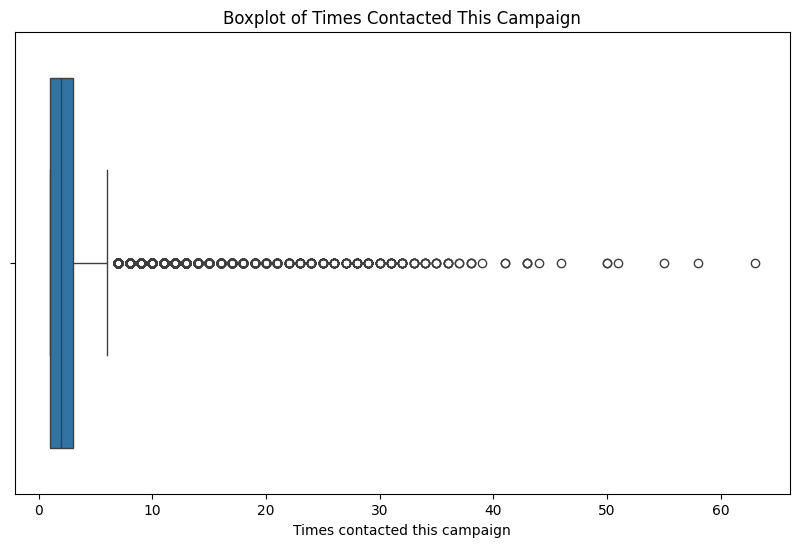

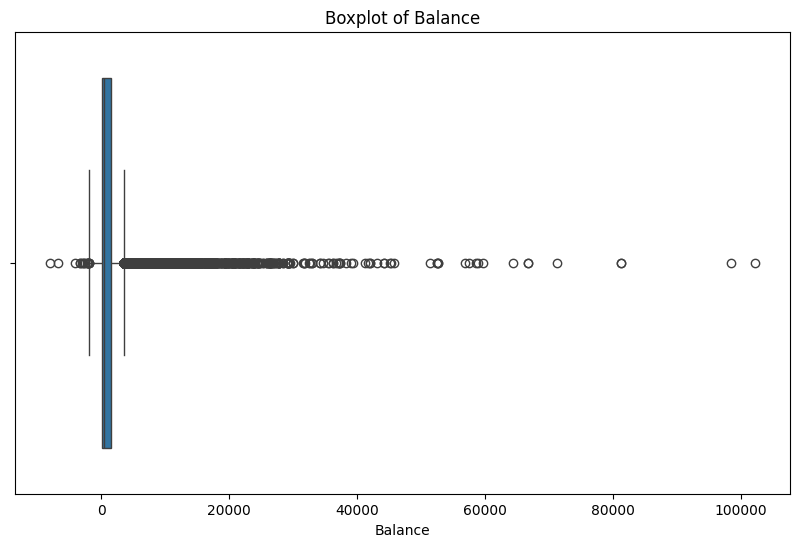

In [222]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['times contacted this campaign'])
plt.title('Boxplot of Times Contacted This Campaign')
plt.xlabel('Times contacted this campaign')
plt.show()

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['balance'])
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()

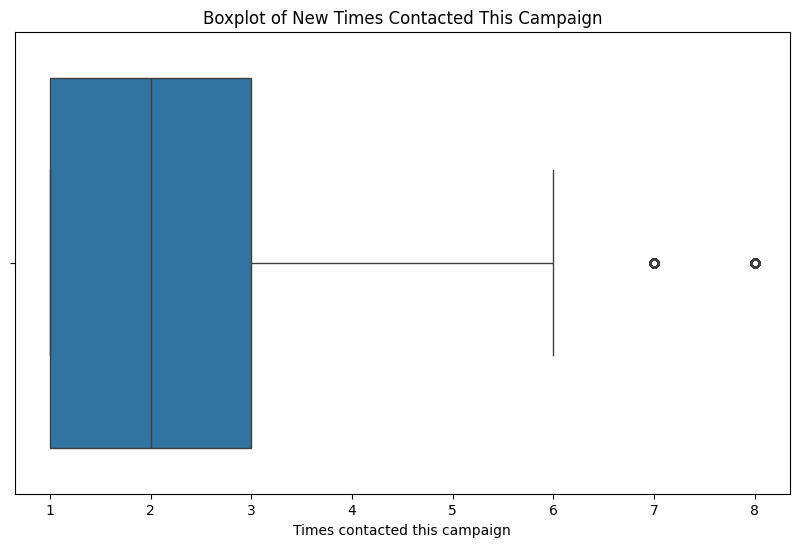

In [223]:
# Replace outliers with the 95th percentile value
q95 = np.percentile(df['times contacted this campaign'], 95)
df['new times contacted this campaign'] = np.where(df['times contacted this campaign'] > q95, q95, df['times contacted this campaign'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['new times contacted this campaign'])
plt.title('Boxplot of New Times Contacted This Campaign')
plt.xlabel('Times contacted this campaign')
plt.show()

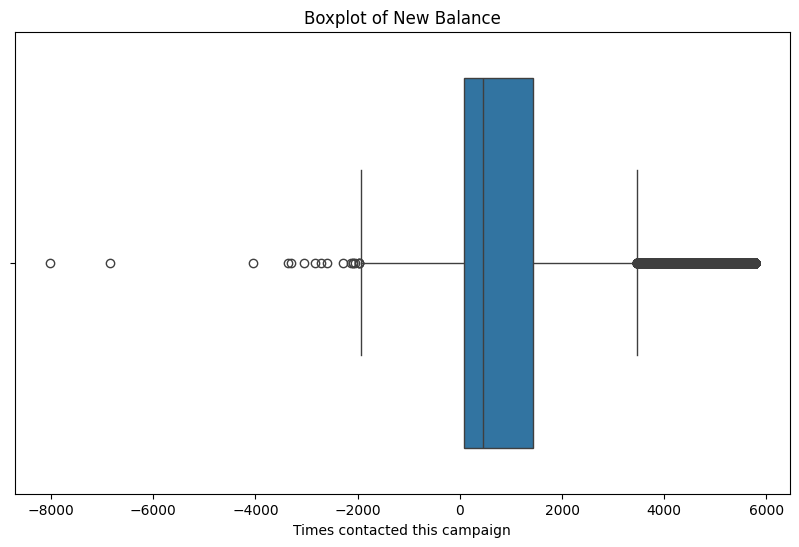

In [224]:
# Replace outliers with the 95th percentile value
q95 = np.percentile(df['balance'], 95)
df['new balance'] = np.where(df['balance'] > q95, q95, df['balance'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['new balance'])
plt.title('Boxplot of New Balance')
plt.xlabel('Times contacted this campaign')
plt.show()

In [225]:
# 'Balance' and 'Times contacted this campaign' update
new_numerical_features = ['new balance', 'new times contacted this campaign', 'age']
X_numerical = df[new_numerical_features]

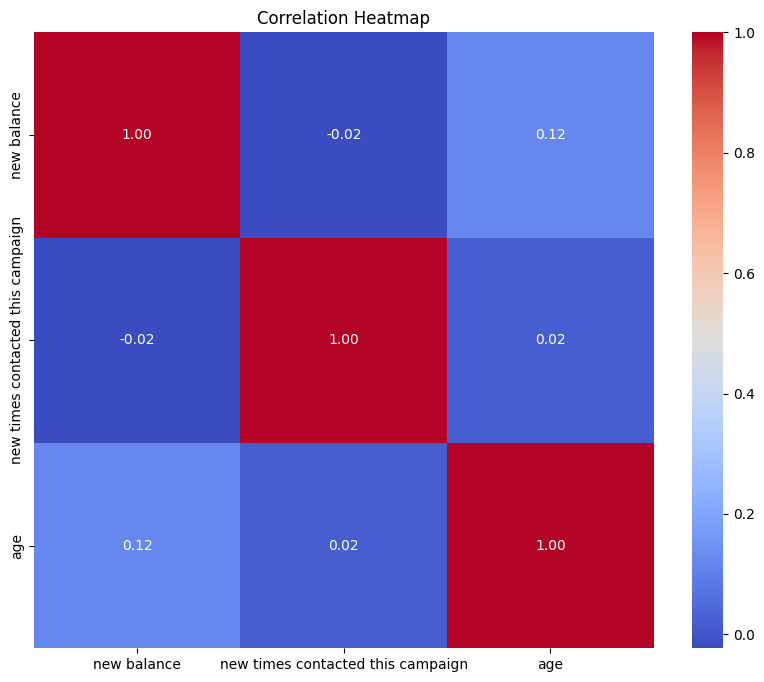

In [226]:
# Correlation matrix for numerical features
correlation_matrix = X_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [227]:
# Handle Ordinal Encoding for 'education'
education_order = ['unknown', 'primary', 'secondary', 'tertiary']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
X_ordinal['education_encoded'] = ordinal_encoder.fit_transform(X_ordinal[['education']])

# One-Hot Encoding for categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Scale the numerical data for clustering
scaler = StandardScaler()
num_scaled = scaler.fit_transform(X_numerical)
num_df = pd.DataFrame(num_scaled)

# Combine all features
X_final = pd.concat([
    X_categorical_encoded,        # Add one-hot encoded categorical features
    X_ordinal['education_encoded'],  # Add ordinal-encoded 'education'
    num_df# Add numerical features
], axis=1)

X_final.head()

,days passed since last contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_yes,loan_yes,previous campaign outcome_other,previous campaign outcome_success,outcome_yes,education_encoded,0,1,2
0,0,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,3.0,0.651829,-0.793438,1.606965
1,0,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,2.0,-0.671310,-0.793438,0.288529
2,0,False,True,False,False,False,False,False,False,False,...,False,True,True,True,False,False,2.0,-0.688209,-0.793438,-0.747384
3,0,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,0.0,0.253135,-0.793438,0.571051
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,0.0,-0.688835,-0.793438,-0.747384


In [228]:
X_final.fillna(X_final.median(), inplace=True) 

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(X_final)

scaled_df.columns = scaled_df.columns.astype(str)

# Reset index to ensure consistent row order
scaled_df = scaled_df.reset_index(drop=True)

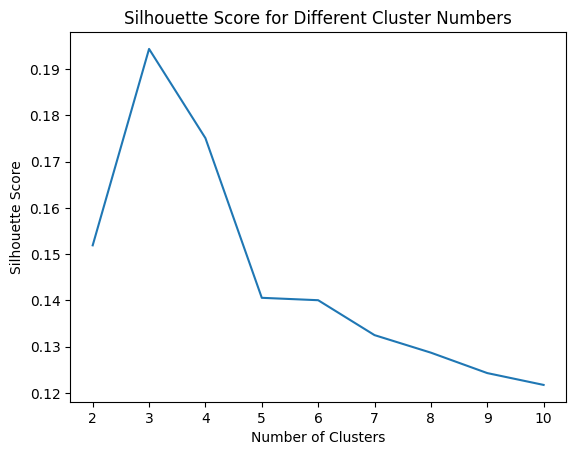

In [231]:
sil_scores = []
for k in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)  # Fixed random state and higher n_init
    kmeans.fit(scaled_df)  # Replace with your scaled data
    score = silhouette_score(scaled_df, kmeans.labels_)
    sil_scores.append(score)

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

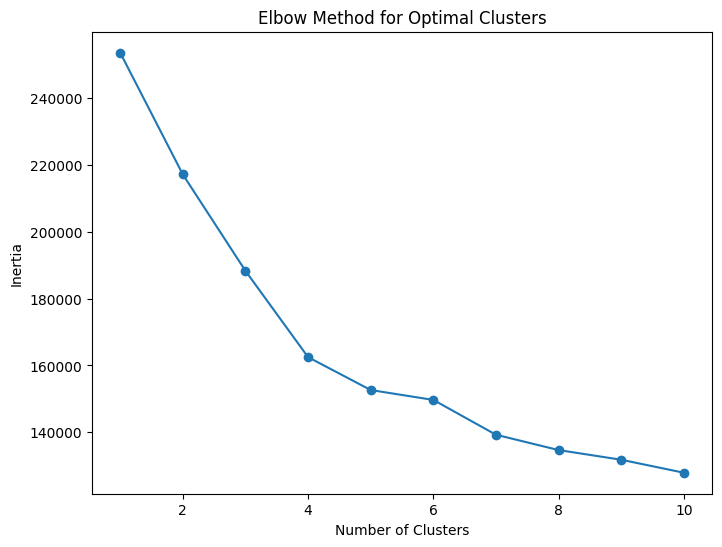

In [232]:
# Clustering: KMeans
# Elbow method to determine optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [233]:
# Apply KMeans clustering with the optimal number of clusters (e.g., 4 from the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_df)
print(scaled_df['Cluster'].value_counts())

Cluster
4    15050
2    11082
0     8462
1     5380
3     5237
Name: count, dtype: int64


In [234]:
df['Cluster'] = scaled_df['Cluster']
# Cluster profiling: Analyzing the mean values of numerical features for each cluster
cluster_profile = df.groupby('Cluster')[X_numerical.columns].mean()
print('Cluster Profile:')
print(cluster_profile)

Cluster Profile:
         new balance  new times contacted this campaign        age
Cluster                                                           
0         666.477074                           1.914677  35.723942
1         664.277881                           6.683086  40.623792
2         709.539524                           1.969410  53.342989
3        4843.485201                           2.284896  43.242314
4         489.086711                           1.833887  34.040399


In [235]:
# Analyzing the size of each cluster
cluster_sizes = scaled_df['Cluster'].value_counts().sort_index()

# Calculate the percentage of each cluster size
total_samples = len(scaled_df)
cluster_percentages = (cluster_sizes / total_samples) * 100

# Display cluster sizes and percentages
print(f'Cluster Sizes:\n{cluster_sizes}')
print(f'\nCluster Percentages:\n{cluster_percentages}')

Cluster Sizes:
Cluster
0     8462
1     5380
2    11082
3     5237
4    15050
Name: count, dtype: int64

Cluster Percentages:
Cluster
0    18.716684
1    11.899759
2    24.511734
3    11.583464
4    33.288359
Name: count, dtype: float64


In [236]:
# Model Evaluation
# Evaluate the clustering with silhouette score
sil_score = silhouette_score(scaled_df, kmeans.labels_)
print("Silhouette Score", silhouette_score(scaled_df, kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(scaled_df, kmeans.labels_))
print("Calinski-Harabasz Index:", calinski_harabasz_score(scaled_df, kmeans.labels_))

Silhouette Score 0.3071321586989487
Davies-Bouldin Index: 1.2777203903519443
Calinski-Harabasz Index: 14934.824889381987


In [237]:
scale_features = scaled_df.drop(columns=['Cluster'])

# Handle missing values
scale_features = scale_features.apply(pd.to_numeric, errors='coerce')

In [238]:
# Compute the correlation of each feature with the cluster
correlations = scaled_df.drop(columns='Cluster').apply(lambda x: x.corr(scaled_df['Cluster']))
print(correlations)

days passed since last contact       0.015855
job_blue-collar                      0.249943
job_entrepreneur                    -0.049281
job_housemaid                        0.004491
job_management                      -0.441915
job_retired                         -0.027468
job_self-employed                   -0.068400
job_services                         0.142617
job_student                          0.061346
job_technician                       0.034965
job_unemployed                       0.019237
job_unknown                         -0.000004
marital_married                     -0.001603
marital_single                       0.013017
default_yes                          0.005125
housing_yes                          0.140753
loan_yes                             0.017225
previous campaign outcome_other     -0.013224
previous campaign outcome_success   -0.023277
outcome_yes                         -0.022234
education_encoded                   -0.460885
0                                 

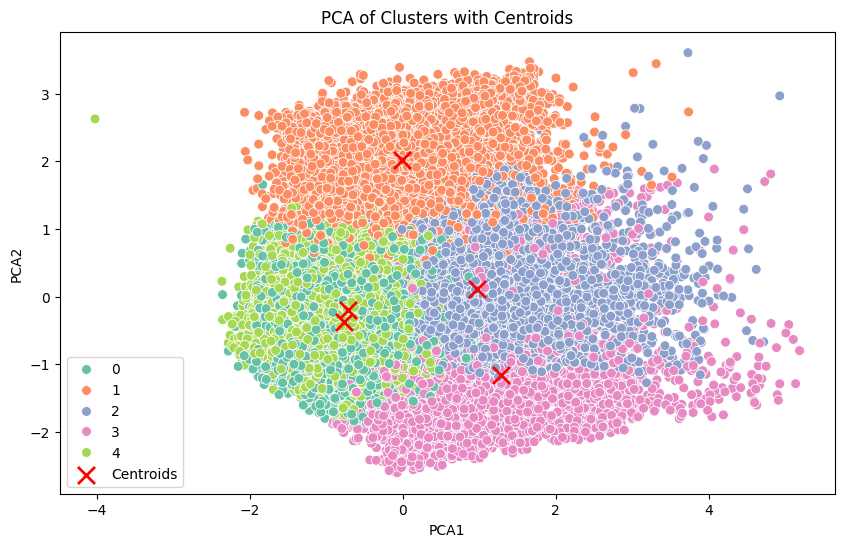

In [239]:
# Perform PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scale_features)  # Ensure scale_features excludes 'Cluster'

# Project centroids into the PCA space
centroids = kmeans.cluster_centers_  # KMeans centroids
pca_centroids = pca.transform(centroids)  # Transform centroids to PCA space

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_  # Add cluster labels

# Visualize clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=50)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='x', s=150, linewidths=2, label='Centroids')
plt.title('PCA of Clusters with Centroids')
plt.legend()
plt.show()

In [240]:
# Apply PCA
pca = PCA(n_components=len(scale_features.columns))
pca.fit(scale_features)

# Get feature contributions to the first principal component
feature_importance_pca = np.abs(pca.components_[0])  # Absolute value of loadings
features = scaled_df.columns
sorted_indices = np.argsort(-feature_importance_pca)  # Sort in descending order

# Print features ranked by importance
for idx in sorted_indices:
    print(f"Feature: {features[idx]}, Contribution: {feature_importance_pca[idx]}")

Feature: 2, Contribution: 0.8060579392947868
Feature: 0, Contribution: 0.47357173046119244
Feature: marital_single, Contribution: 0.1982294709673841
Feature: education_encoded, Contribution: 0.1873734803050175
Feature: marital_married, Contribution: 0.17180701027009318
Feature: housing_yes, Contribution: 0.09490481185690361
Feature: job_retired, Contribution: 0.08101973193517942
Feature: 1, Contribution: 0.05950045108874835
Feature: job_technician, Contribution: 0.02829217160587688
Feature: job_student, Contribution: 0.021360538307479807
Feature: loan_yes, Contribution: 0.021070936925546856
Feature: job_management, Contribution: 0.019517622593090273
Feature: job_services, Contribution: 0.017605036868612676
Feature: job_housemaid, Contribution: 0.014027498204472329
Feature: outcome_yes, Contribution: 0.013100262634398525
Feature: previous campaign outcome_success, Contribution: 0.00755943681262302
Feature: default_yes, Contribution: 0.00724682771451507
Feature: previous campaign outcome

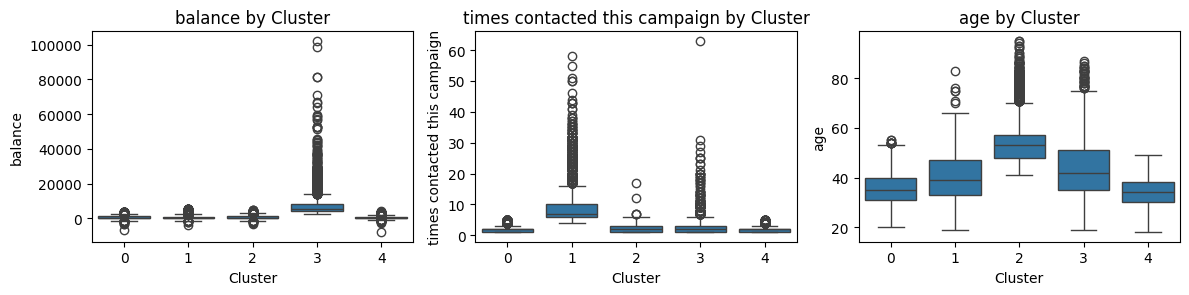

In [241]:
# Visualizing the characteristics of each cluster using boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

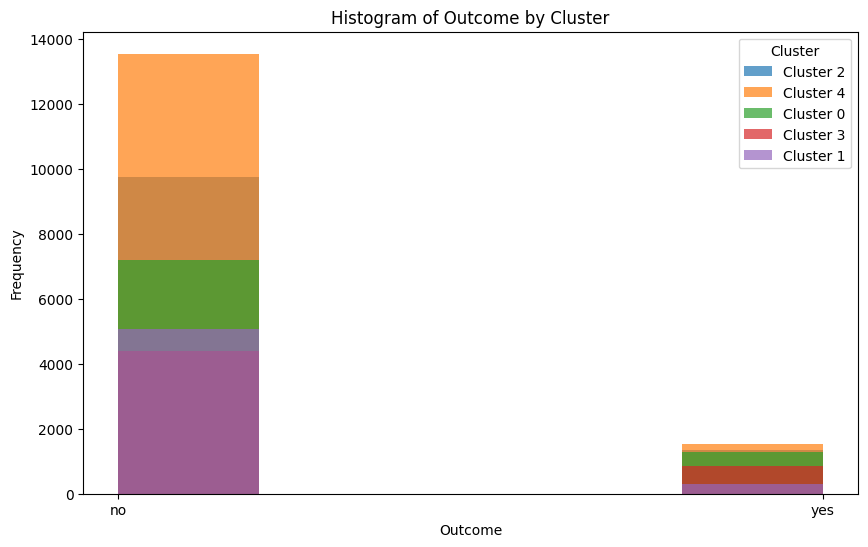

In [242]:
# Create histograms of outcome by cluster
plt.figure(figsize=(10, 6))

# Loop through each cluster and plot a histogram
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]['outcome']
    plt.hist(
        cluster_data, 
        bins=5,  # Reduce number of bins for thicker bars
        alpha=0.7,  # Transparency
        label=f'Cluster {cluster}', 
        rwidth=1.0  # Maximize bar width (no space between bars)
    )

plt.title('Histogram of Outcome by Cluster')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

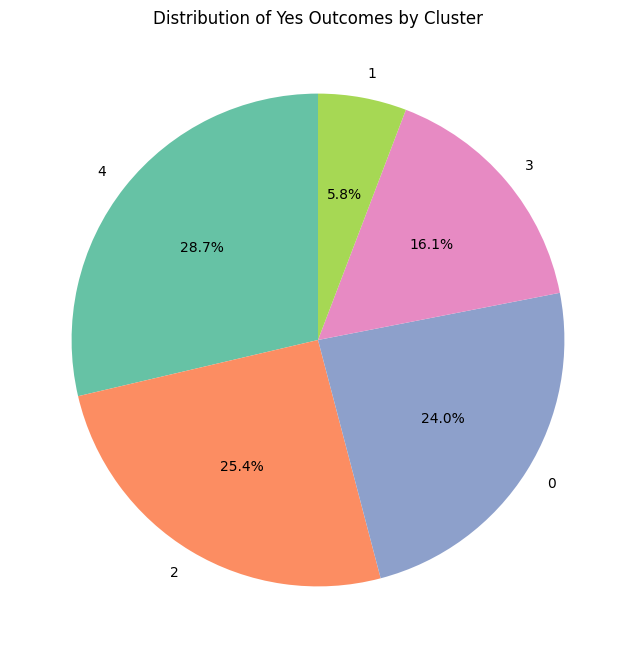

In [243]:
# Filter the data for 'yes' or '1' outcomes
yes_data = df[df['outcome'] == 'yes']
# Count the number of "yes" outcomes per cluster
yes_counts = yes_data['Cluster'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))

plt.pie(
    yes_counts, 
    labels=yes_counts.index, 
    autopct='%1.1f%%',  # Show percentages
    startangle=90, 
    colors=sns.color_palette('Set2', len(yes_counts))
)

plt.title('Distribution of Yes Outcomes by Cluster')
plt.show()

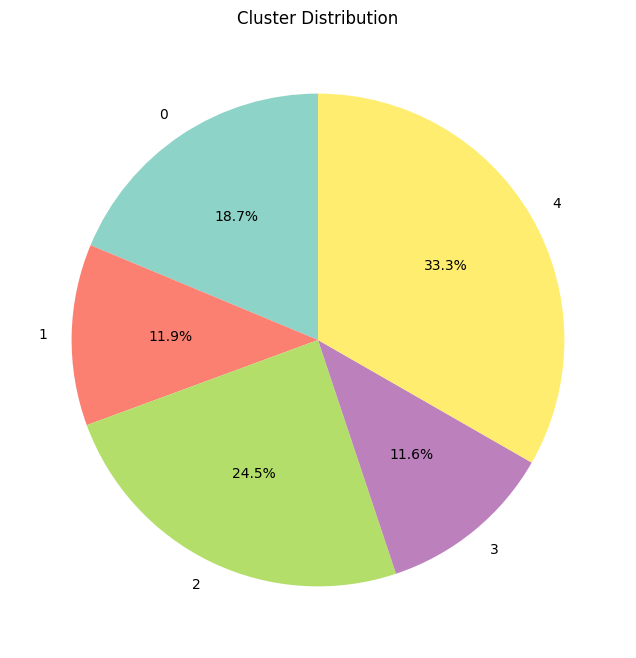

In [244]:
# Visualizing the distribution of clusters using a pie chart
plt.figure(figsize=(8, 8))
cluster_sizes.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Cluster Distribution')
plt.ylabel('')
plt.show()